幼儿园是每个孩子成长道路上不可或缺的一部分，它不仅能够为孩子提供早期教育，还能够帮助孩子建立自信、社交能力和解决问题的能力。然而，幼儿园的数量、分布和质量却是备受关注的话题。如何准确地了解中国各省的幼儿园数量和分布情况，是一个非常重要的问题。在本文中，我们将介绍如何使用Stata中的readhtmltable命令和maptile命令，来读取和展示2021年中国各省幼儿园的情况。

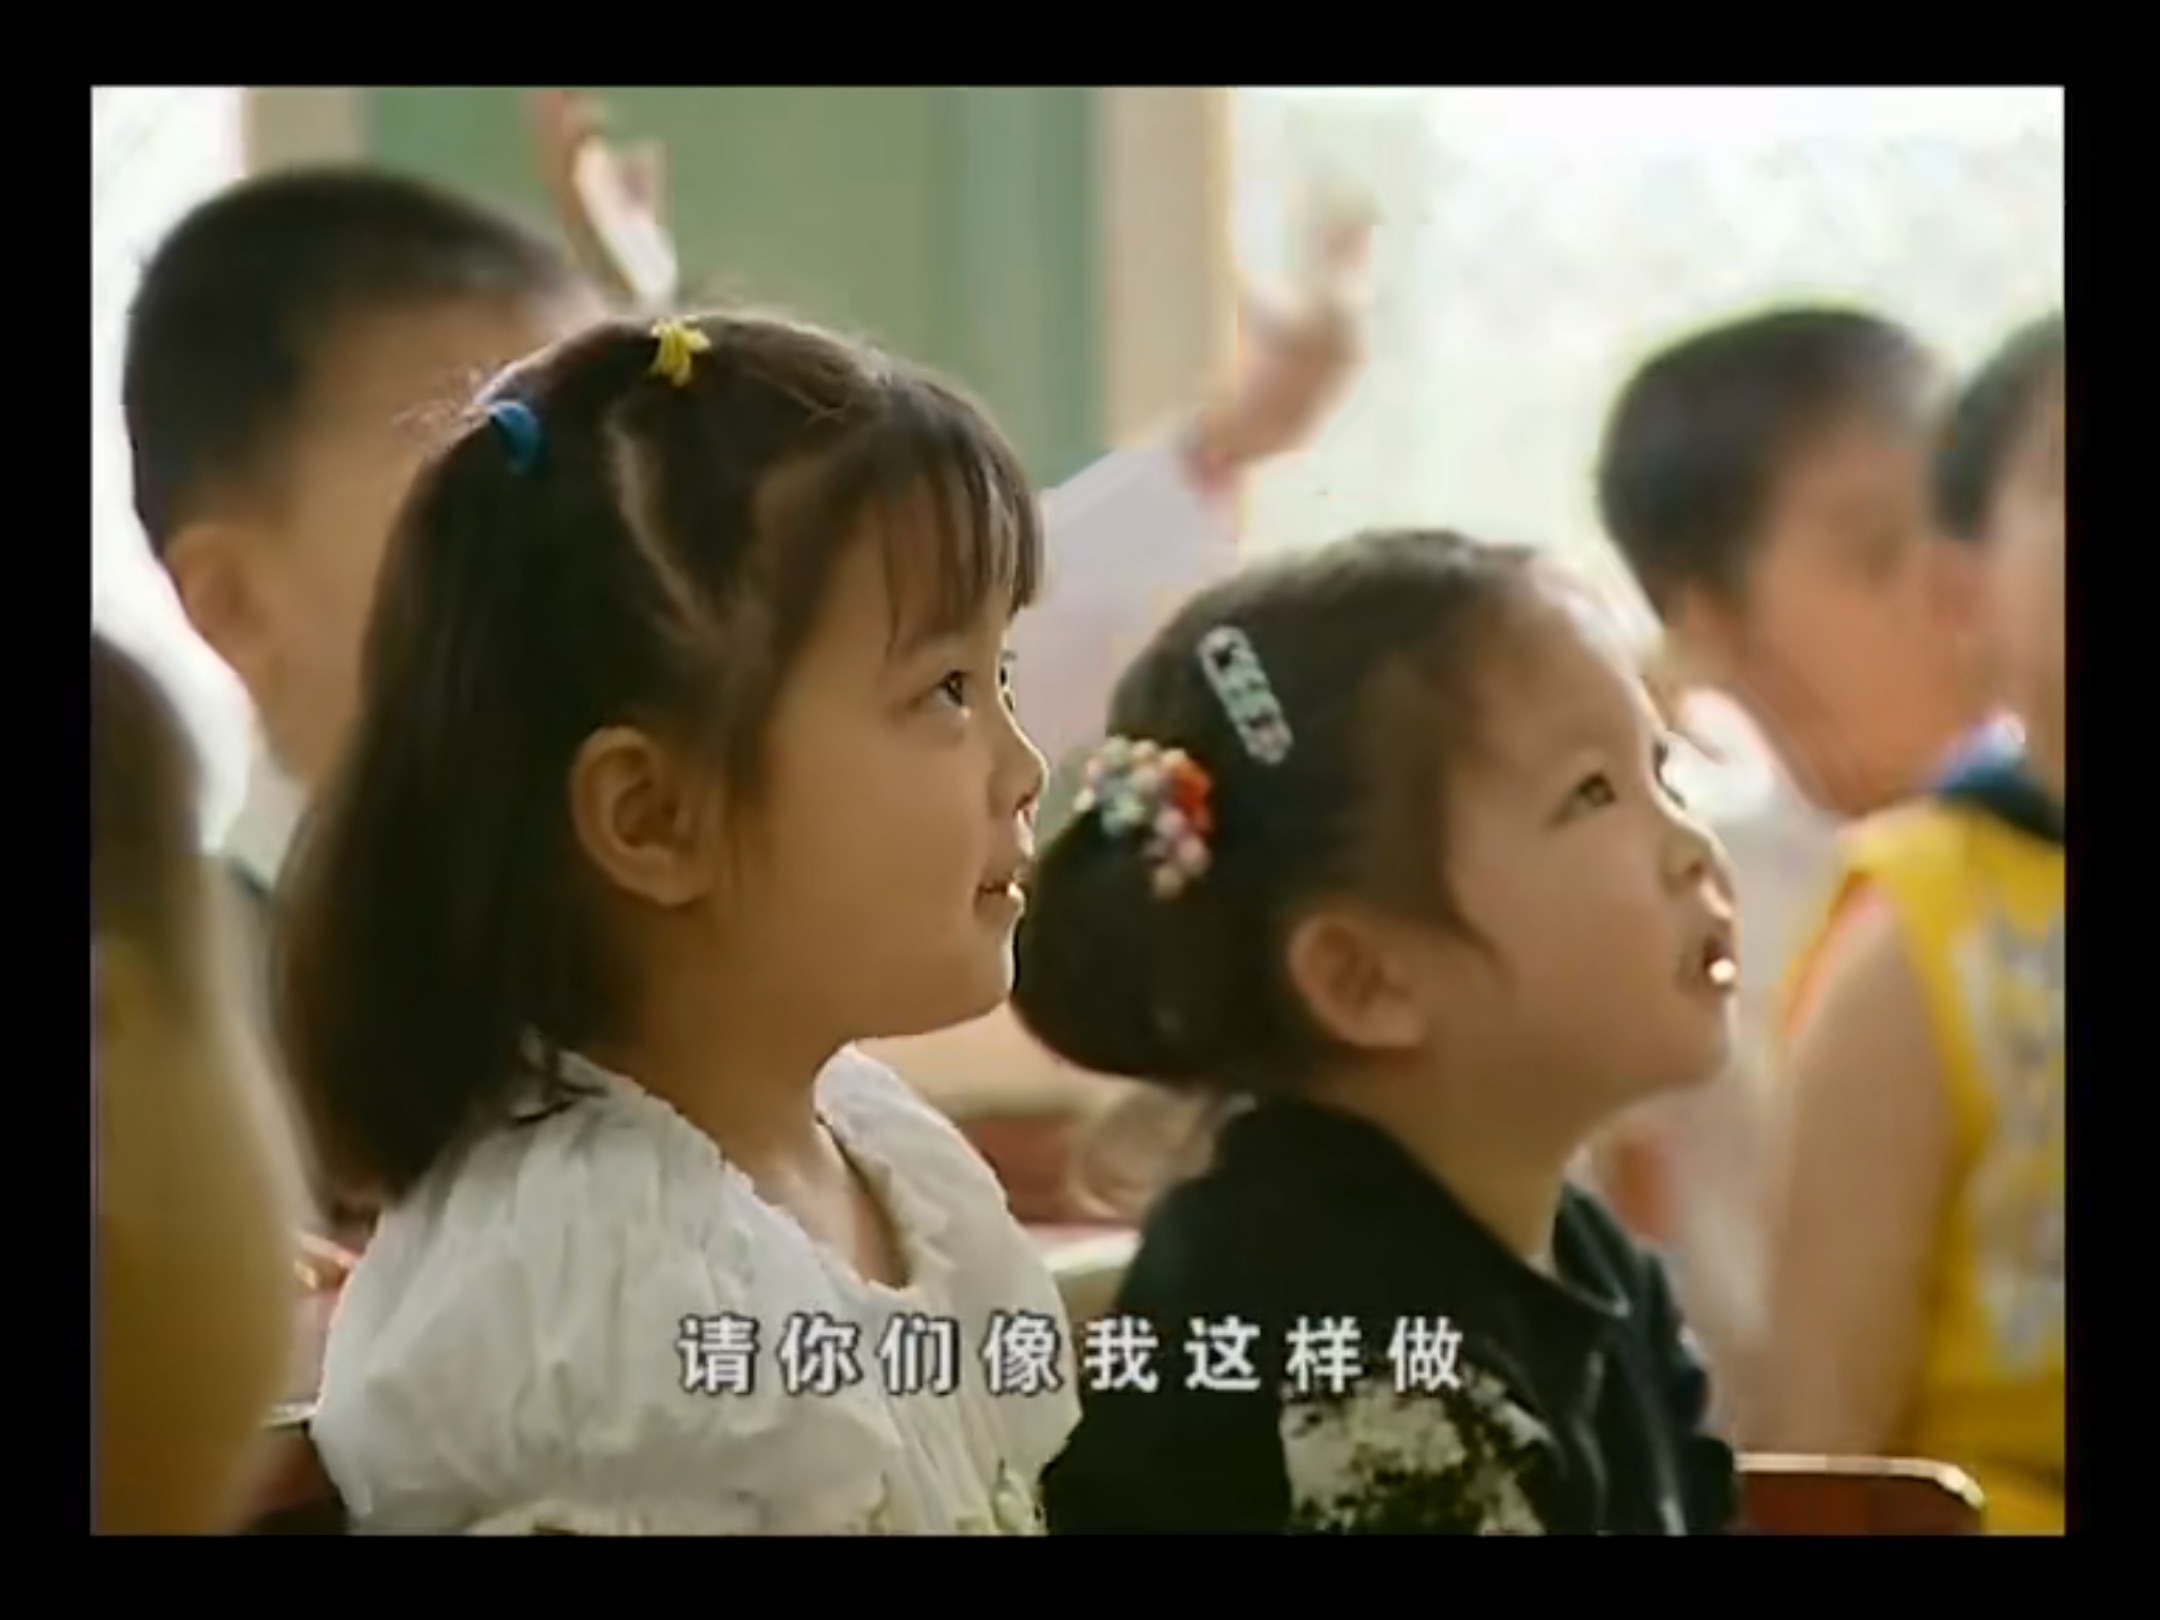
图片来源：纪录片《幼儿园》

# 一、命令简介与安装

- readhtmltable：将网页中的表格转换为stata数据  
The readhtmltable program reads a web page, identifies any tables it contains, and turns them into a data set.  
- maptile：生成分级着色地图  
maptile makes it easy to map a variable in Stata. It generates choropleth maps, where each area is shaded according to the value of the variable being plotted. 
- spmap：一个旨在可视化各种空间数据的Stata模块，特别适用于绘制主题地图和显示空间数据分析结果  
spmap is aimed at visualizing several kinds of spatial data, and is particularly suited for drawing thematic maps and displaying the results of spatial data analyses.



In [7]:
capture net install readhtml，from(https://ssc.wisc.edu/sscc/stata/)
capture ssc install maptile
capture ssc install spmap

# 二、maptile与地图模板内联

如果绘制的主题是美国或者加拿大的地图，编写maptile的作者已经提供了丰富的模板；但是如果是绘制其他国家的地图的话，目前需要在maptile的ado文件中进行修改，使之与本地的地图模板相关联。
1. 下载作者提供的美国各州的地图模板进行参考（https://michaelstepner.com/maptile/geographies/） 将解压后的geo_state文件夹中的ado和smcl文件复制到自己的地图模板文件夹中（这里命名为china_map）。为了避免对ado文件修改太多内容，本文将地图模板中省份变量也命名为了state，地图模板文件的命名同样也与geo_state中的一致。
2. 将china_map中的ado文件进行修改，使maptile能够识别自己的地图模板。此时我们可以借助科研助手chatgpt，把ado文件中的内容复制给它进行学习，让小chat写命令帮助我们进行修改。
3. 我们将小chat提供的代码直接复制到ado文件的代码后面，修改成自己的geofolder（本文为china_map）和geoname（本文为state）。然后将china_map文件进行压缩，压缩包放到stata的personal路径下，运行如下命令进行解压，即可实现maptile与本地地图模板的关联。

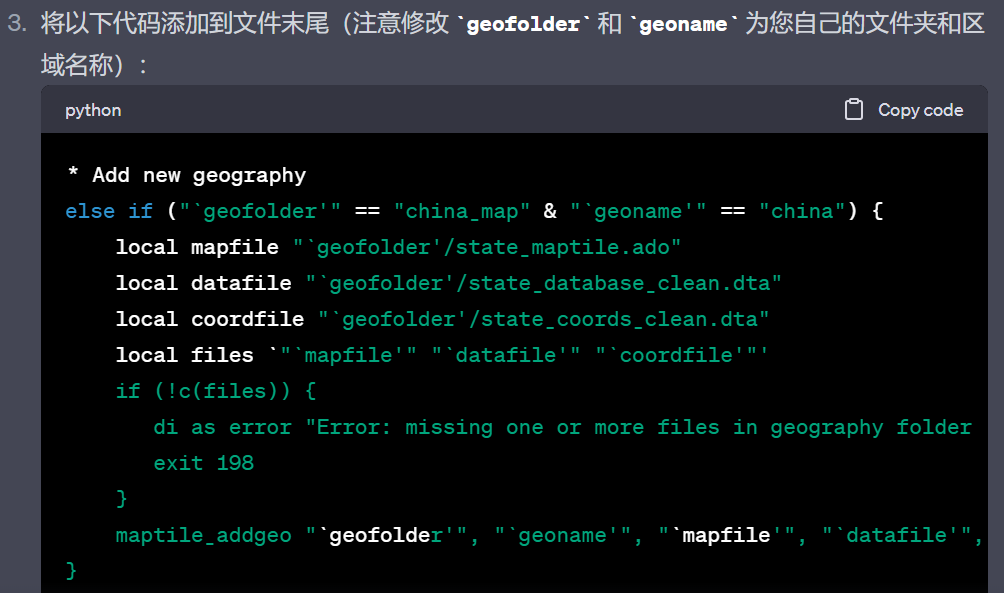

In [ ]:
maptile_install using "china_map.zip"


c:\ado\personal\maptile_geographies
    inflating: china_map/state_coords_clean.dta
    inflating: china_map/state_database_clean.dta
    inflating: china_map/state_maptile.ado
    inflating: china_map/state_maptile.smcl

successfully unzipped temp.zip to current directory
total processed:  4
        skipped:  0
      extracted:  4

To see the help file of the geography template, run:
    maptile_geohelp geoname


# 三、readhtmltable读取网页数据

在这里我们使用readhtmltable读取教育部公布的2021年学校教育基本情况表，并保留了幼儿园数量的数据进行处理

In [4]:
readhtmltable http://www.moe.gov.cn/jyb_sjzl/moe_560/2021/gedi/202212/t20221230_1037279.html, varnames
drop in 1/3
keep t1c1 _
rename _ kindergartens
destring kindergartens,replace
drop if kindergartens==.
gen state = ustrregexra( t1c1 , "[^\u4e00-\u9fa5]", "", .)


Reading http://www.moe.gov.cn/jyb_sjzl/moe_560/2021/gedi/202212/t20221230_103727
> 9.html

(3 observations deleted)



kindergartens: all characters numeric; replaced as int
(2 missing values generated)

(2 observations deleted)



# 四、一键绘制分级着色地图

In [6]:
maptile kindergartens, geo(state) fcolor(Greens) geofolder("C:\ado\personal\maptile_geographies\china_map") ///
twopt(title("2021年全国各省幼儿园数量"))

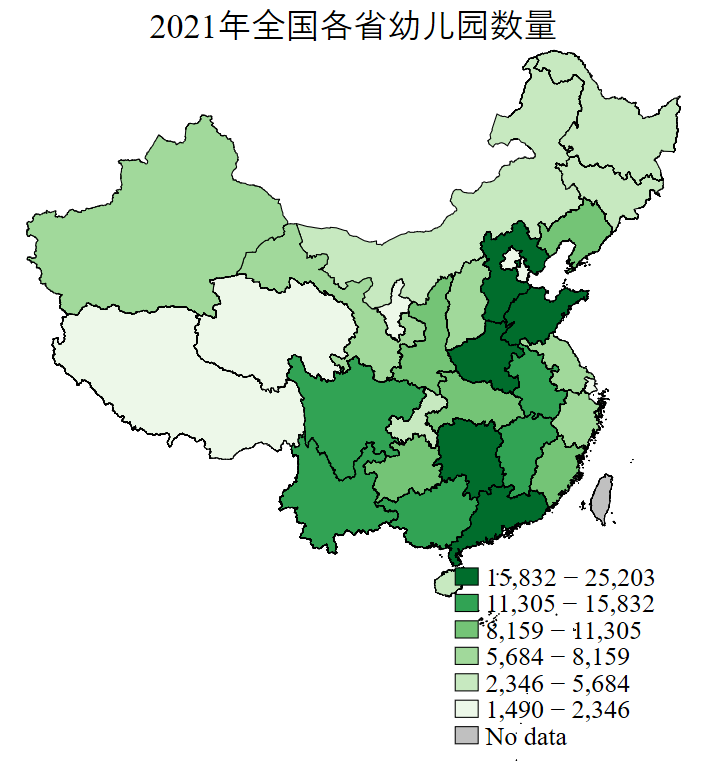